In [1]:

# import basic modules
import sys
import os
import time
import numpy as np
from tqdm import tqdm
import gc
import torch
import argparse
import skimage.transform

# import custom modules
code_dir = '/user_data/mmhender/imStat/code/'
sys.path.append(code_dir)

from utils import nsd_utils, roi_utils, default_paths, prf_utils
from model_fitting import initialize_fitting as initialize_fitting
from plotting import plot_prf_params

fpX = np.float32
device = 'cpu:0'
# device = initialize_fitting.init_cuda()

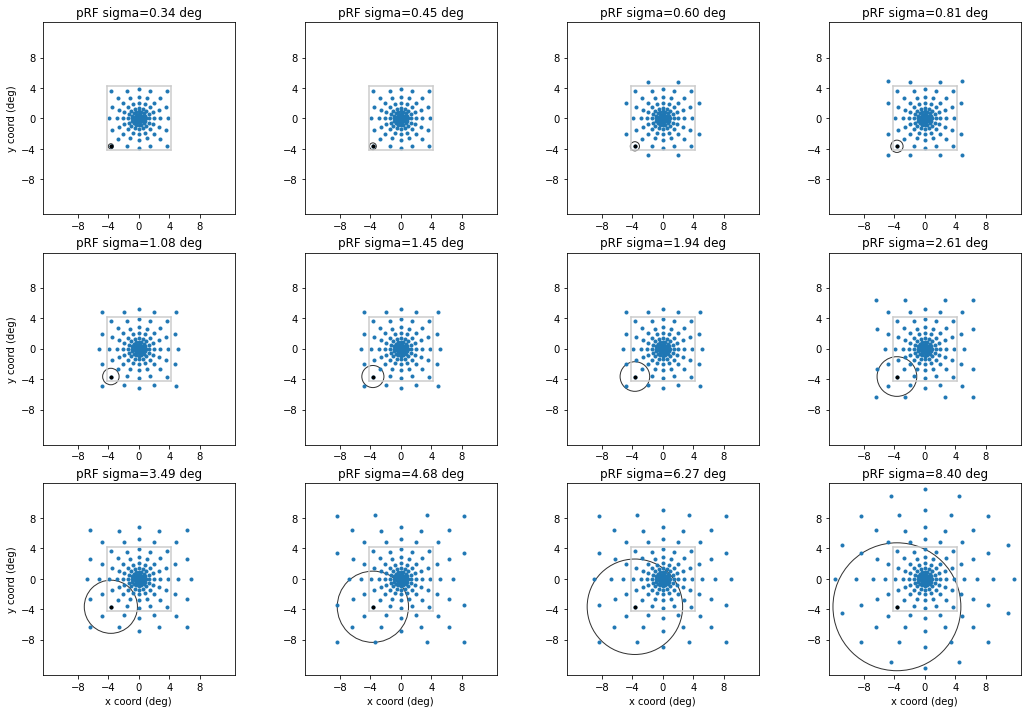

In [2]:
prf_models = prf_utils.make_polar_angle_grid(sigma_range=[0.04, 1], n_sigma_steps=12, \
                              eccen_range=[0, 1.4], n_eccen_steps=12, n_angle_steps=16)
plot_prf_params.plot_prf_grid(prf_models)

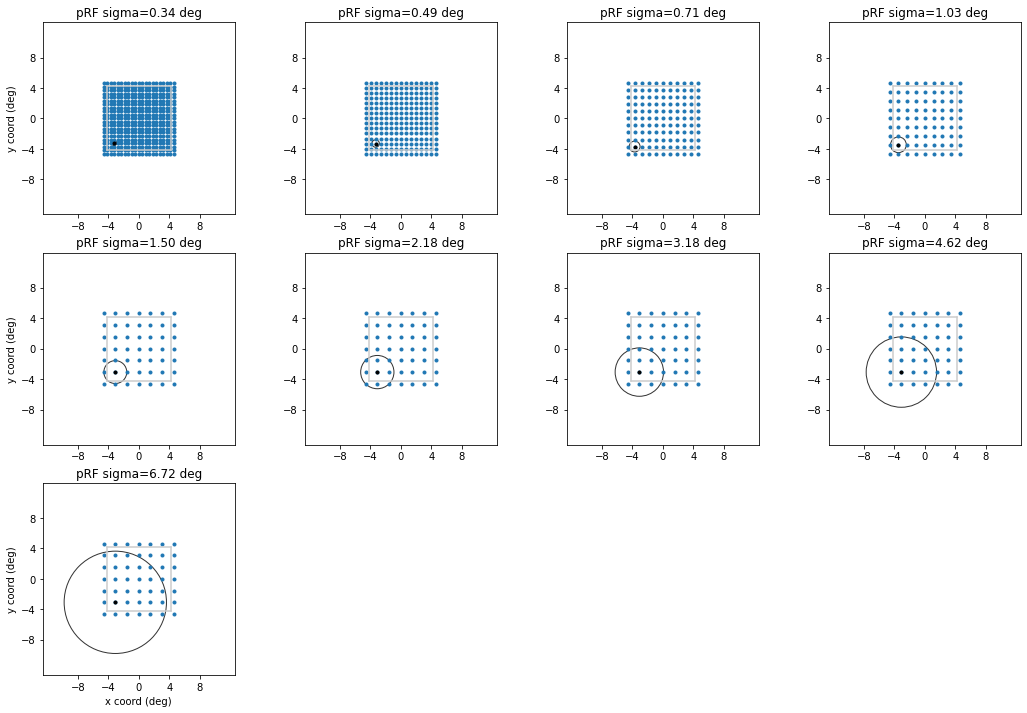

In [3]:
smin, smax = np.float32(0.04), np.float32(0.8)
n_sizes = 9
prf_models = prf_utils.model_space_pyramid2(prf_utils.logspace(n_sizes)(smin, smax), \
                                        min_spacing=1.4, aperture=1.1)  
plot_prf_params.plot_prf_grid(prf_models[0:-1,:])

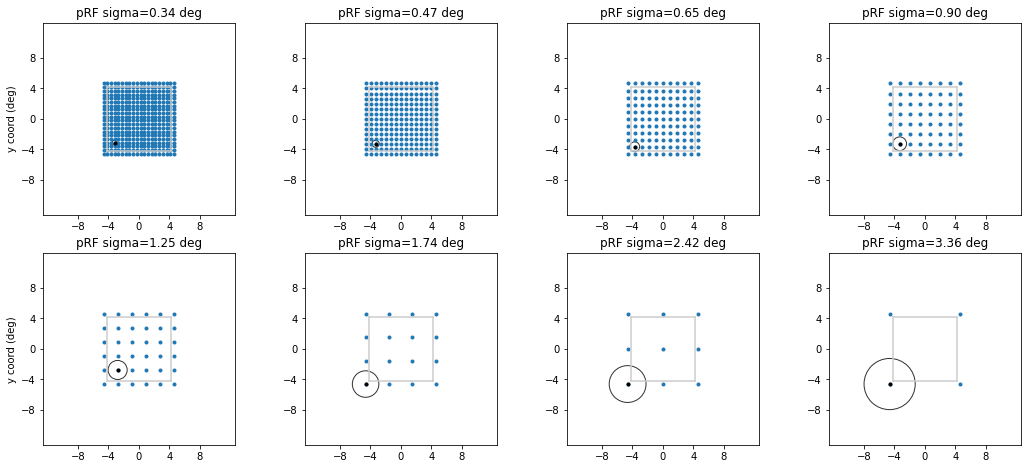

In [16]:
smin, smax = np.float32(0.04), np.float32(0.4)
n_sizes = 8
prf_models = prf_utils.model_space_pyramid(prf_utils.logspace(n_sizes)(smin, smax), \
                                        min_spacing=1.4, aperture=1.1)  
plot_prf_params.plot_prf_grid(prf_models)

In [15]:
prf_models

array([[-0.55      , -0.55      ,  0.04      ],
       [-0.49210526, -0.55      ,  0.04      ],
       [-0.43421053, -0.55      ,  0.04      ],
       ...,
       [-0.55      ,  0.55      ,  0.52146906],
       [ 0.55      ,  0.55      ,  0.52146906],
       [-0.55      , -0.55      ,  0.80000001]])

[-0.32548225, 0.32548225, 0.053597614]


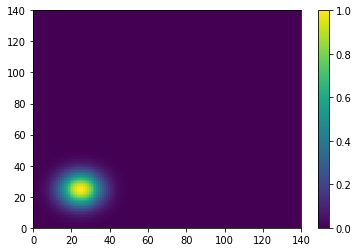

In [4]:
import matplotlib.pyplot as plt
x,y,sigma = prf_models[220,:]
print([x,y,sigma])
n_pix = 140
aperture = 1.0
prf = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix, aperture=1.0)

minval = np.min(prf)
maxval = np.max(prf-minval)
prf_scaled = (prf - minval)/maxval

prf1 = prf_scaled

plt.figure();
plt.pcolormesh(prf_scaled)
plt.colorbar()

In [22]:
np.where((models[:,0]==0)&(models[:,1]==0.0))

(array([ 220,  553,  726,  827,  892,  941,  990, 1039, 1088, 1113]),)

[-0.32548225, 0.32548225, 0.053597614]


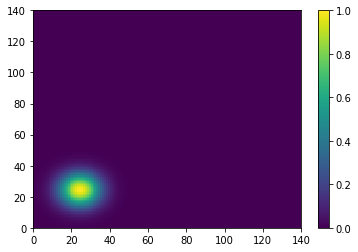

In [5]:
x,y,sigma = prf_models[220,:]
print([x,y,sigma])
n_pix = 140
aperture = 1.0
prf = prf_utils.make_gaussian_mass(x, y, sigma, n_pix, size=aperture, \
                          dtype=np.float32)[2]
minval = np.min(prf)
maxval = np.max(prf-minval)
prf_scaled = (prf - minval)/maxval

prf2 = prf_scaled

plt.figure();
plt.pcolormesh(prf_scaled)
plt.colorbar()

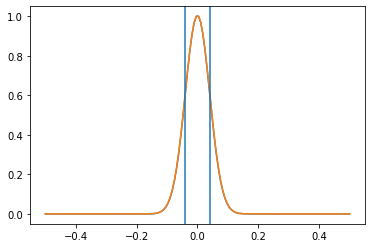

In [10]:
plt.figure();
plt.plot(np.linspace(-0.5, 0.5, n_pix), prf1[int(np.ceil(n_pix/2)),:])
plt.plot(np.linspace(-0.5, 0.5, n_pix), prf2[int(np.ceil(n_pix/2)),:])
plt.axvline(-sigma)
plt.axvline(sigma)

In [3]:
# Load and prepare the image set to work with (all images for the current subject, 10,000 ims)
stim_root = default_paths.stim_root
subject=1
image_data = nsd_utils.get_image_data(subject)  
image_data = nsd_utils.image_uncolorize_fn(image_data)



Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


In [15]:
np.round(np.unique(prf_models[:,0]),2)

array([-1.4 , -1.29, -1.07, -0.99, -0.99, -0.99, -0.82, -0.76, -0.76,
       -0.75, -0.62, -0.58, -0.57, -0.54, -0.54, -0.46, -0.44, -0.44,
       -0.43, -0.41, -0.41, -0.34, -0.33, -0.31, -0.31, -0.31, -0.24,
       -0.24, -0.24, -0.24, -0.24, -0.22, -0.18, -0.18, -0.17, -0.17,
       -0.17, -0.15, -0.13, -0.13, -0.12, -0.12, -0.11, -0.1 , -0.09,
       -0.09, -0.08, -0.08, -0.06, -0.06, -0.06, -0.06, -0.04, -0.04,
       -0.04, -0.04, -0.03, -0.03, -0.02, -0.02, -0.02, -0.02, -0.01,
       -0.01, -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.01,  0.02,
        0.02,  0.02,  0.02,  0.03,  0.03,  0.03,  0.04,  0.04,  0.04,
        0.04,  0.06,  0.06,  0.06,  0.06,  0.06,  0.08,  0.08,  0.09,
        0.09,  0.1 ,  0.11,  0.12,  0.12,  0.13,  0.13,  0.15,  0.15,
        0.17,  0.17,  0.17,  0.18,  0.18,  0.22,  0.22,  0.24,  0.24,
        0.24,  0.24,

In [16]:
np.where((prf_models[:,0]==-0.22)&(prf_models[:,1]==0.44))

(array([], dtype=int64),)

In [21]:
np.where((np.round(prf_models[:,0],2)==-0.22))

(array([  72,   74,  189,  191,  306,  308,  431,  433,  560,  562,  693,
         695,  826,  828,  959,  961, 1104, 1106, 1253, 1255, 1414, 1416,
        1579, 1581]),)

In [25]:
np.where((np.round(prf_models[:,0],2)==0.31))

(array([  82,   96,  199,  213,  316,  330,  441,  455,  570,  584,  703,
         717,  836,  850,  969,  983, 1018, 1025, 1114, 1128, 1164, 1174,
        1263, 1277, 1313, 1323, 1424, 1438, 1474, 1484, 1589, 1603, 1639,
        1649]),)

In [39]:
np.where((np.round(prf_models[:,1],2)==-.34))

(array([  93,  210,  327,  452,  581,  714,  847,  980, 1125, 1274, 1435,
        1600]),)

[4.030973e-09, -0.33803046, 0.04]


(0.0, 240.0, 240.0, 0.0)

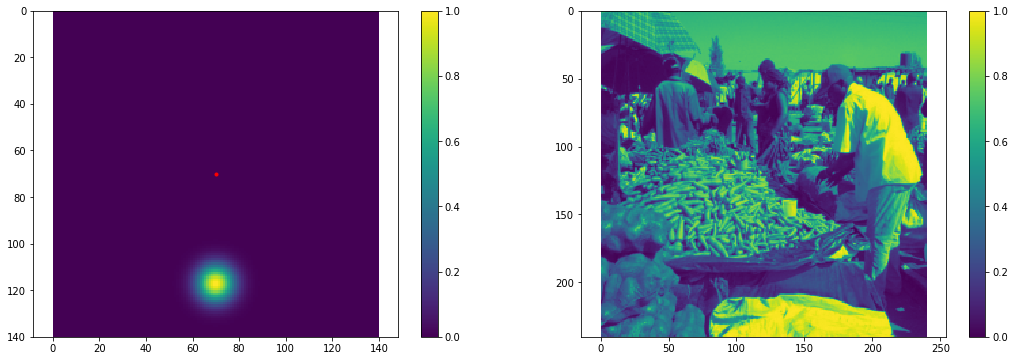

In [40]:
import matplotlib.pyplot as plt
# x,y,sigma = prf_models[72,:]
# x,y,sigma = prf_models[82,:]
x,y,sigma = prf_models[93,:]
# x,y,sigma = prf_models[1499,:]
# x,y,sigma = prf_models[355]
print([x,y,sigma])
n_pix = 140
aperture = 1.0
prf = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix, aperture=1.0)

minval = np.min(prf)
maxval = np.max(prf-minval)
prf_scaled = (prf - minval)/maxval

prf1 = prf_scaled

plt.figure(figsize=(18,6));
plt.subplot(1,2,1)
plt.pcolormesh(prf_scaled)
plt.colorbar()
plt.gca().invert_yaxis()
center = np.round(prf1.shape[0]/2)
plt.plot(center, center, '.',color='r')
plt.axis('equal')

plt.subplot(1,2,2)
plt.pcolormesh(image_data[0,0,:,:])
plt.colorbar()
plt.gca().invert_yaxis()
plt.axis('equal')
